In [1]:
library(SingleCellExperiment)
library(ggplot2)
library(multinichenetr)
library(Seurat)
library(tidyverse)
library(data.table)
library(dplyr)
library(rjson)
options(warn=-1)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

# load color map

In [3]:
COLOR_PAlETTE=fromJSON(file='../../data/result/cleaned_files/ColorMap_R_sync.json')

# Define the output folder where stored the interaction result

In [4]:
Object_Output_Folder = '../../data/result/manuscript_object/Celltype'

# Downstream analysis for predictive interactions 

In [24]:
multinichenet_output = readRDS(file.path(Object_Output_Folder,'multinichenet_NvsNR_Baseline.rds'))

Joining with `by = join_by(id, sender, receiver, ligand, receptor, group)`
Joining with `by = join_by(sender)`
Joining with `by = join_by(receiver)`
Joining with `by = join_by(sender)`
Joining with `by = join_by(receiver)`


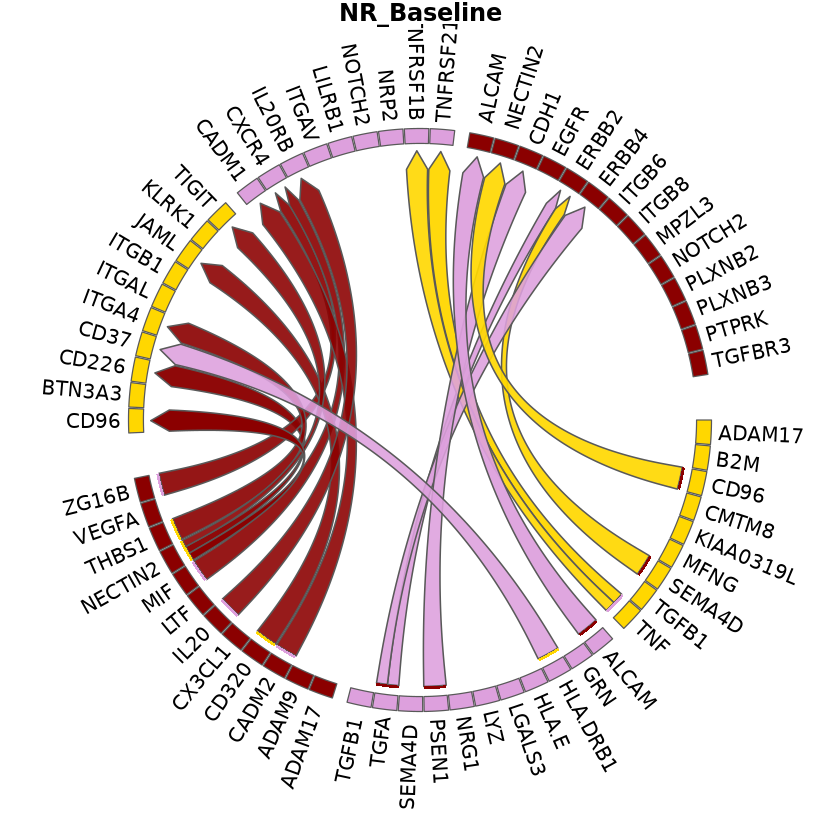

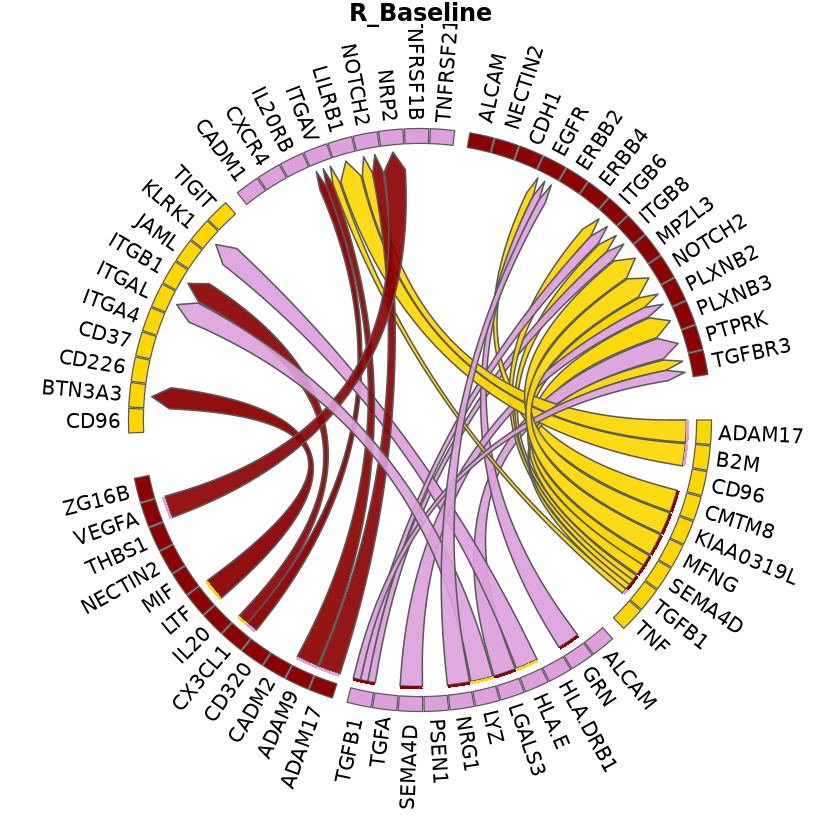

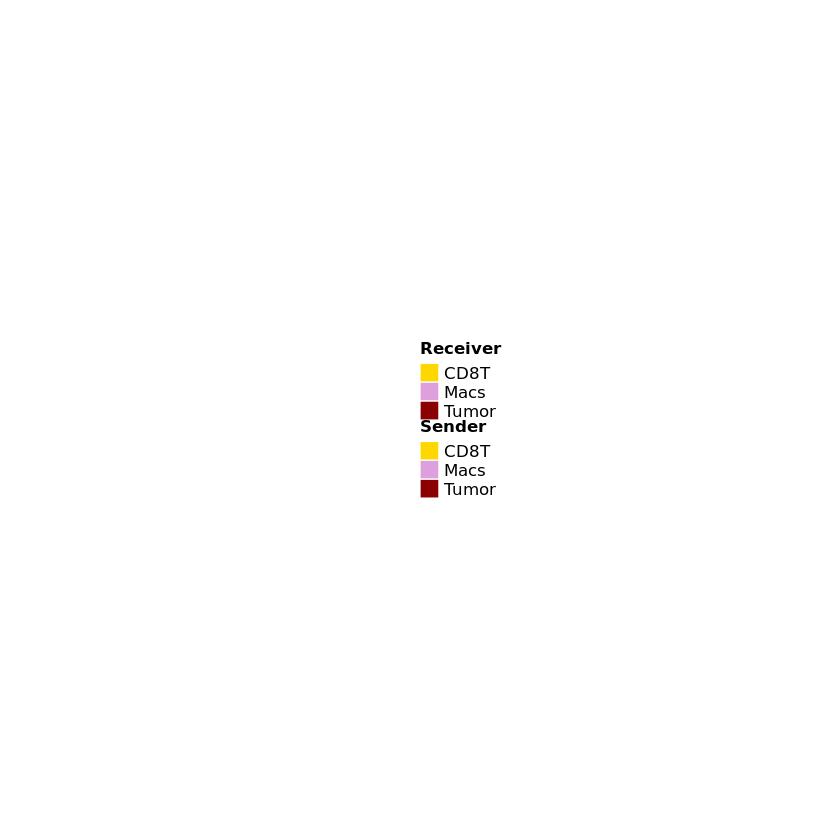

In [25]:
options(warn=-1)
prioritized_tbl_oi_all = get_top_n_lr_pairs(multinichenet_output$prioritization_tables, 50, rank_per_group =T,
                                            senders_oi = c('CD8T','Macs','Tumor'),
                                            receivers_oi= c('CD8T','Macs','Tumor')
                                           )
prioritized_tbl_oi_all = prioritized_tbl_oi_all[prioritized_tbl_oi_all$sender!=prioritized_tbl_oi_all$receiver,]
prioritized_tbl_oi = multinichenet_output$prioritization_tables$group_prioritization_tbl %>%
  filter(id %in% prioritized_tbl_oi_all$id) %>%
  distinct(id, sender, receiver, ligand, receptor, group) %>% left_join(prioritized_tbl_oi_all)
prioritized_tbl_oi$prioritization_score[is.na(prioritized_tbl_oi$prioritization_score)] = 0

senders_receivers = union(prioritized_tbl_oi$sender %>% unique(), prioritized_tbl_oi$receiver %>% unique()) %>% sort()
colors_sender = c()
colors_name = c()
for( celltype in names(COLOR_PAlETTE$Celltype)){
    if(celltype %in% senders_receivers){
        colors_sender  = c(colors_sender ,COLOR_PAlETTE$Celltype[[celltype]])
        colors_name = c(colors_name,celltype)
        }
}
colors_sender = colors_sender %>% magrittr::set_names(colors_name)
colors_receiver = colors_sender

circos_list = make_circos_group_comparison(prioritized_tbl_oi, colors_sender, colors_receiver)

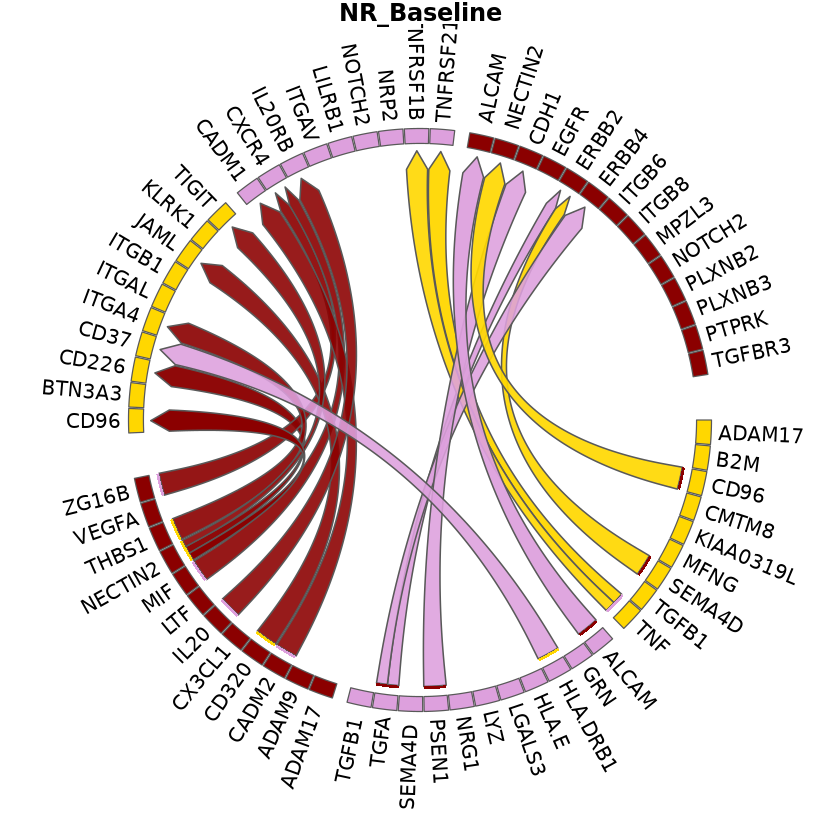

In [26]:
print(circos_list$NR_Baseline)

In [27]:
prioritized_tbl_oi_all = get_top_n_lr_pairs(multinichenet_output$prioritization_tables, 3000, rank_per_group =T,
                                            senders_oi = c('CD8T','Macs','Tumor'),
                                            receivers_oi= c('CD8T','Macs','Tumor')
                                           )
write.table(prioritized_tbl_oi_all,'../../data/result/manuscript_table/multinichenetr_NR_vs_R_Baseline_Top3000_per_group.tsv',
            row.names =F,quote = F,sep='\t')
write.table(multinichenet_output$prioritization_tables$sample_prioritization_tbl,
            '../../data/result/manuscript_table/multinichenetr_NR_vs_R_Baseline_sample_prioritization_tbl.tsv',row.names =F,quote = F,sep='\t')
write.table(multinichenet_output$prioritization_tables$group_prioritization_tbl,
            '../../data/result/manuscript_table/multinichenetr_NR_vs_R_Baseline_group_prioritization_tbl.tsv',row.names =F,quote = F,sep='\t')

### Filtered lr differentially expressed in the cellstates of interested

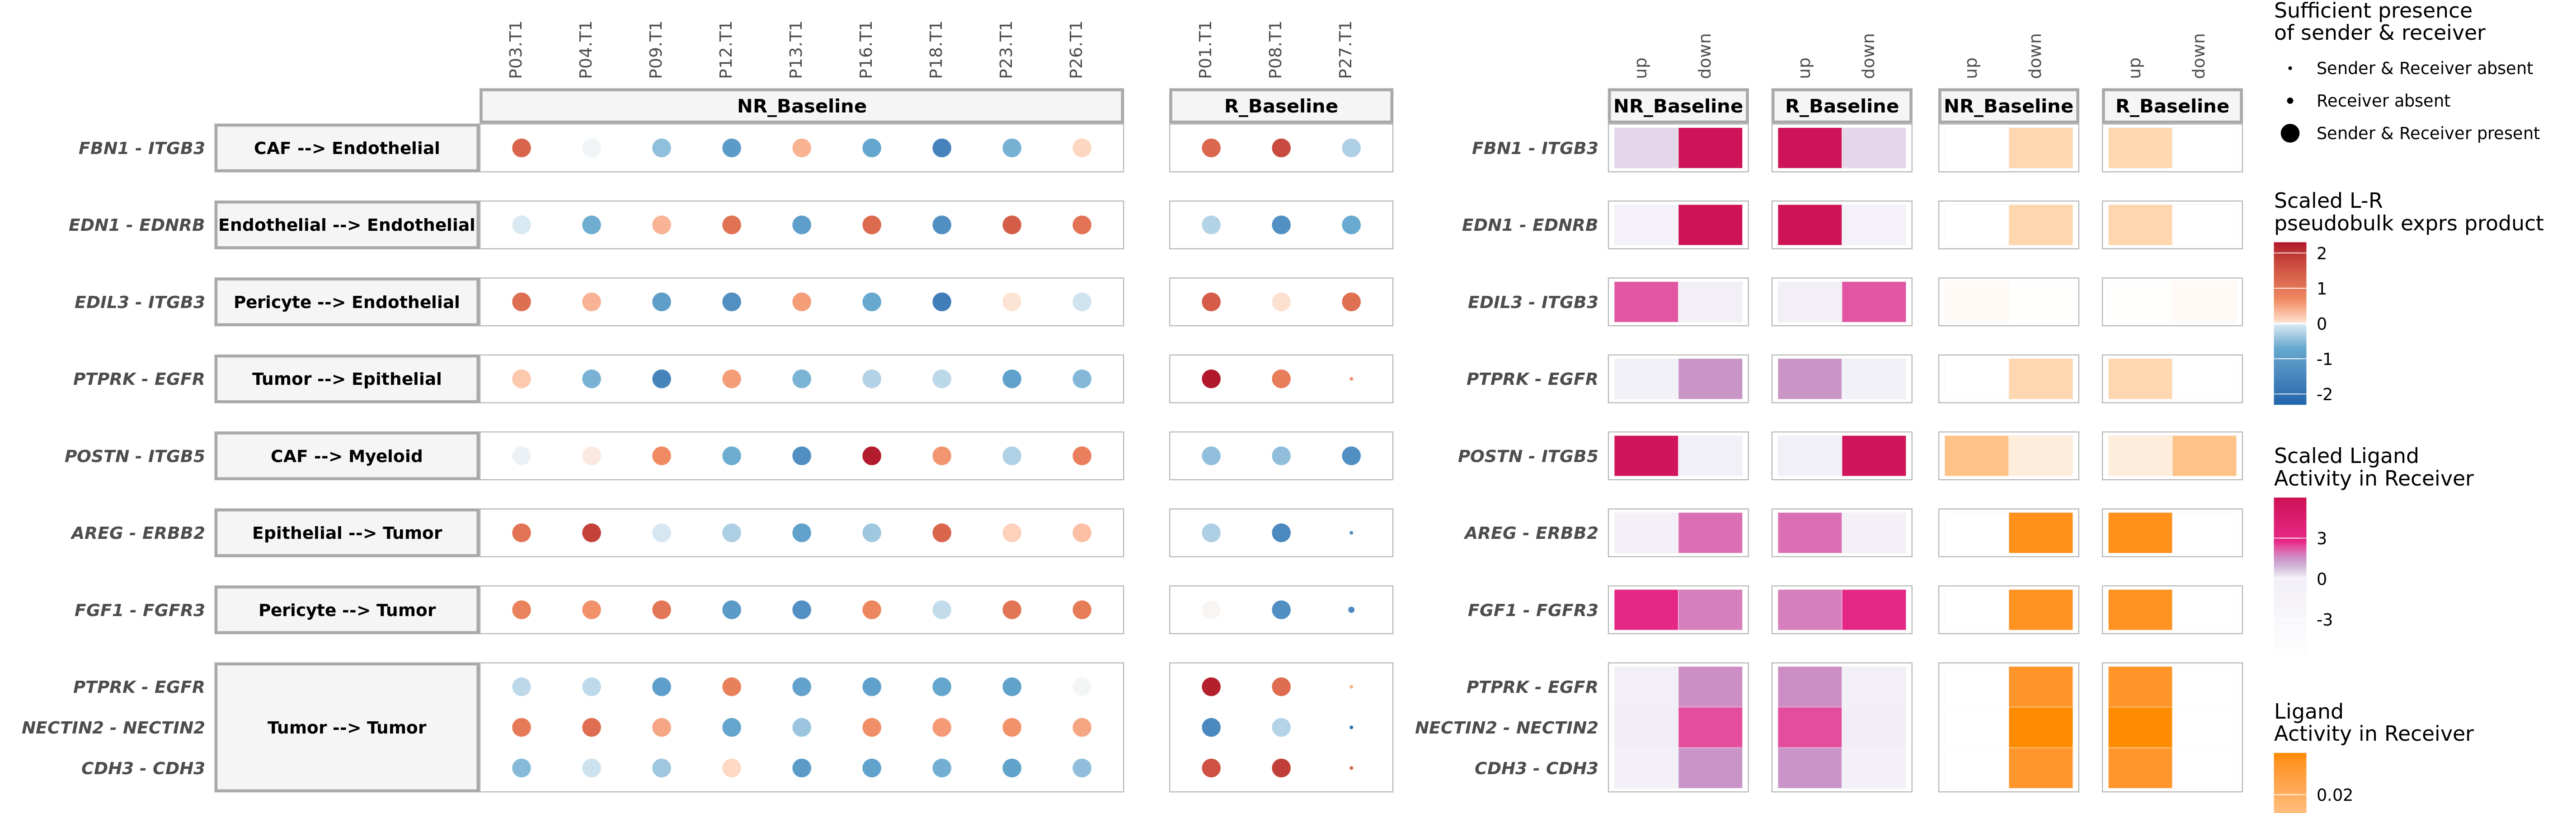

In [47]:
options(repr.plot.width=19, repr.plot.height=6,repr.plot.res = 300,repr.plot.pointsize=50)
prioritized_tbl_oi_selected = read.table('../../data/result/manuscript_table/multinichenetr_NR_vs_R_Baseline_Top50_per_group_OI.tsv',sep='\t',header=T)
plot_oi = make_sample_lr_prod_activity_plots(multinichenet_output$prioritization_tables, prioritized_tbl_oi_selected)
plot_oi

In [8]:
# prioritized_tbl_oi_selected = read.table('../../data/result/manuscript_table/multinichenetr_NR_vs_R_Baseline_Top50_per_group_OI.tsv',sep='\t',header=T)
# senders_receivers = union(prioritized_tbl_oi_selected$sender %>% unique(), prioritized_tbl_oi_selected$receiver %>% unique()) %>% sort()
# colors_sender = c()
# colors_name = c()
# for( celltype in names(COLOR_PAlETTE$Celltype)){
#     if(celltype %in% senders_receivers){
#         colors_sender  = c(colors_sender ,COLOR_PAlETTE$Celltype[[celltype]])
#         colors_name = c(colors_name,celltype)
#         }
# }
# colors_sender = colors_sender %>% magrittr::set_names(colors_name)
# colors_receiver = colors_sender

# circos_list = make_circos_group_comparison(prioritized_tbl_oi_selected, colors_sender, colors_receiver)

# Downstream analysis on the changes from baseline to W7D1

In [16]:
multinichenet_output = readRDS(file.path(Object_Output_Folder,'multinichenet_NvsNR_Delta_Baseline_W7D1.rds'))

Joining with `by = join_by(id, sender, receiver, ligand, receptor, group)`
Joining with `by = join_by(sender)`
Joining with `by = join_by(receiver)`
Joining with `by = join_by(sender)`
Joining with `by = join_by(receiver)`


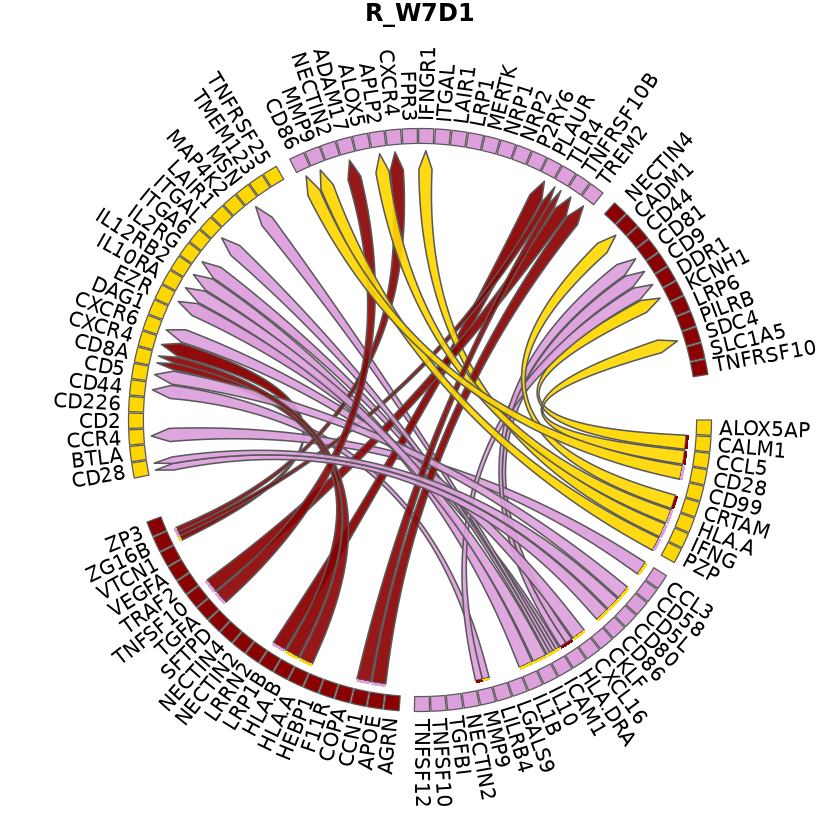

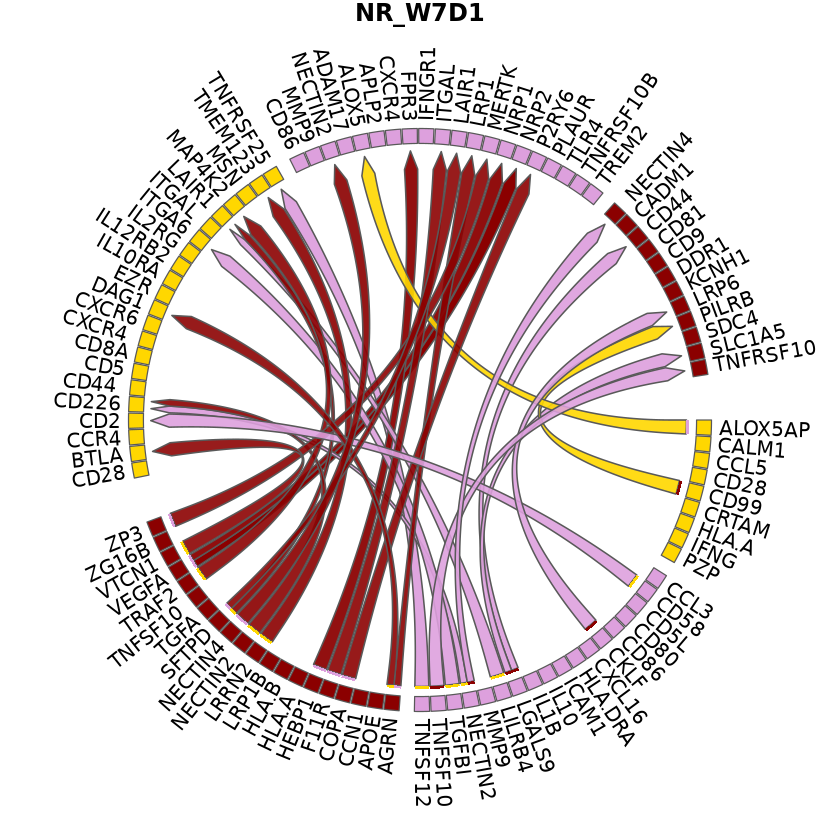

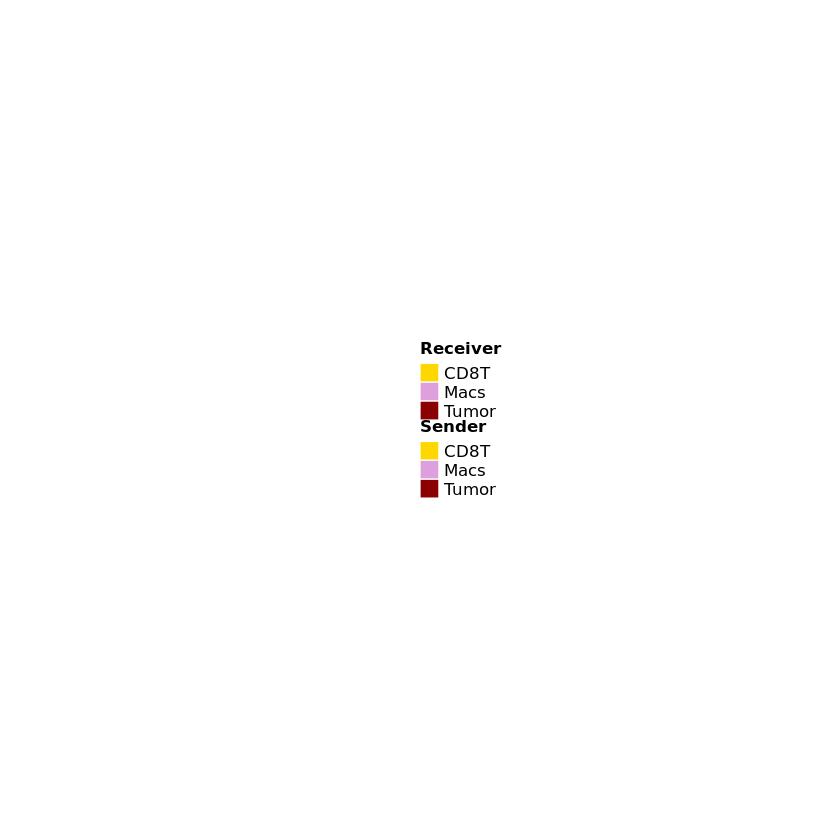

In [19]:
prioritized_tbl_oi_all = get_top_n_lr_pairs(multinichenet_output$prioritization_tables, 50, rank_per_group =T,
                                            senders_oi = c('CD8T','Macs','Tumor'),
                                            receivers_oi= c('CD8T','Macs','Tumor')
                                           )
prioritized_tbl_oi_all = prioritized_tbl_oi_all[prioritized_tbl_oi_all$sender!=prioritized_tbl_oi_all$receiver,]
prioritized_tbl_oi = multinichenet_output$prioritization_tables$group_prioritization_tbl %>%
  filter(id %in% prioritized_tbl_oi_all$id) %>%
  distinct(id, sender, receiver, ligand, receptor, group) %>% left_join(prioritized_tbl_oi_all)
prioritized_tbl_oi$prioritization_score[is.na(prioritized_tbl_oi$prioritization_score)] = 0

senders_receivers = union(prioritized_tbl_oi$sender %>% unique(), prioritized_tbl_oi$receiver %>% unique()) %>% sort()
colors_sender = c()
colors_name = c()
for( celltype in names(COLOR_PAlETTE$Celltype)){
    if(celltype %in% senders_receivers){
        colors_sender  = c(colors_sender ,COLOR_PAlETTE$Celltype[[celltype]])
        colors_name = c(colors_name,celltype)
        }
}
colors_sender = colors_sender %>% magrittr::set_names(colors_name)
colors_receiver = colors_sender

circos_list = make_circos_group_comparison(prioritized_tbl_oi, colors_sender, colors_receiver)

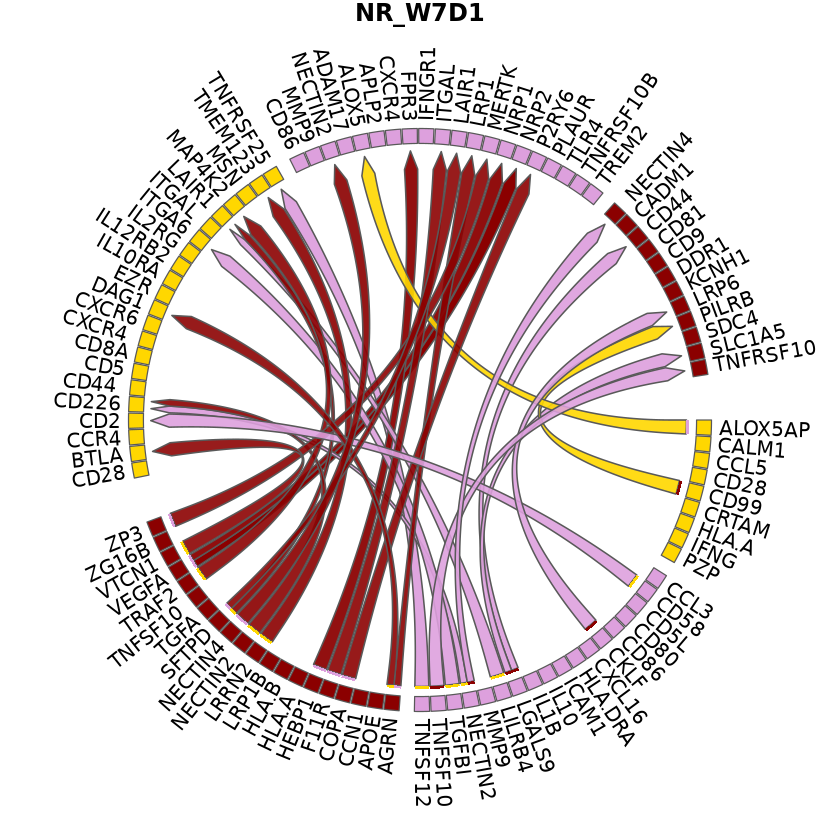

In [21]:
print(circos_list$NR_W7D1)

In [22]:
prioritized_tbl_oi_all = get_top_n_lr_pairs(multinichenet_output$prioritization_tables, 3000, rank_per_group =T,
                                            senders_oi = c('CD8T','Macs','Tumor'),
                                            receivers_oi= c('CD8T','Macs','Tumor')
                                           )
write.table(prioritized_tbl_oi_all,'../../data/result/manuscript_table/multinichenetr_NR_vs_R_Delta_Top3000_per_group.tsv',row.names =F,quote = F,sep='\t')
write.table(multinichenet_output$prioritization_tables$sample_prioritization_tbl,
            '../../data/result/manuscript_table/multinichenetr_NR_vs_R_Delta_sample_prioritization_tbl.tsv',row.names =F,quote = F,sep='\t')
write.table(multinichenet_output$prioritization_tables$group_prioritization_tbl,
            '../../data/result/manuscript_table/multinichenetr_NR_vs_R_Delta_group_prioritization_tbl.tsv',row.names =F,quote = F,sep='\t')

In [11]:
names(multinichenet_output)

[1] "celltype_info"                     "abundance_data_receiver"          
[3] "abundance_data_sender"             "celltype_de"                      
[5] "ligand_activities_targets_DEgenes" "prioritization_tables"            
[7] "lr_prod_mat"                       "grouping_tbl"                     
[9] "lr_target_prior_cor"

### Filtered lr differentially expressed in the cellstates of interested

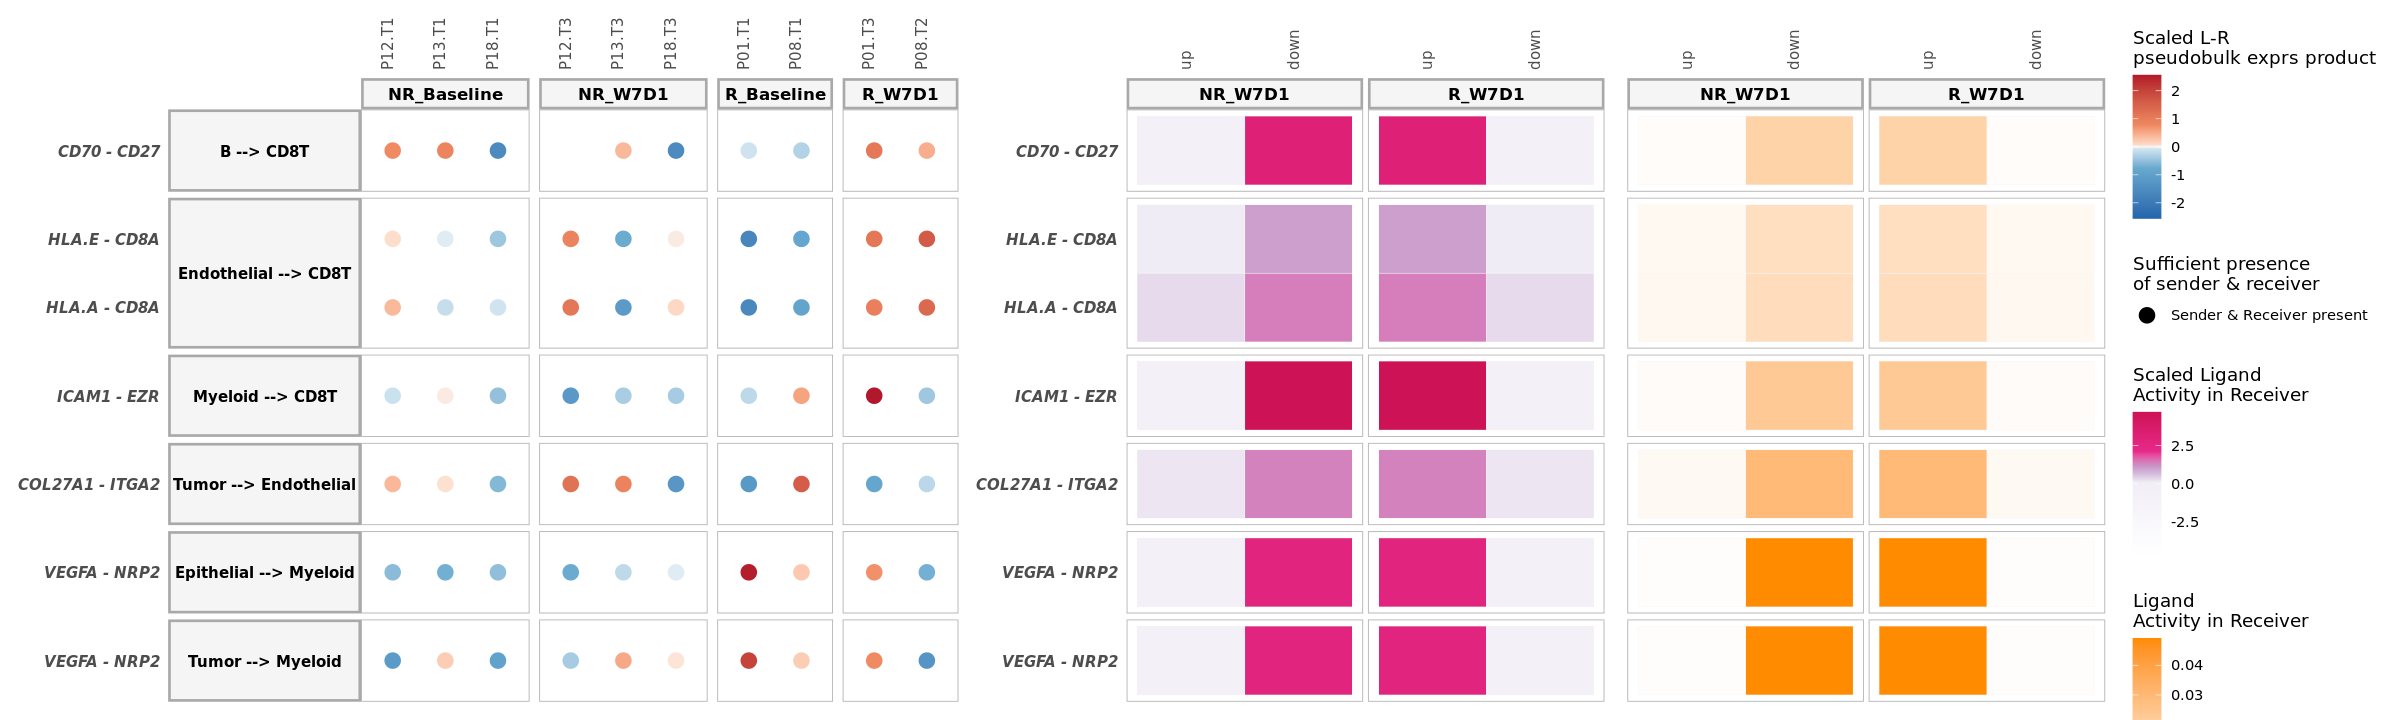

In [34]:
options(repr.plot.width=20, repr.plot.height=6)
prioritized_tbl_oi_selected = read.table('../../data/result/manuscript_table/multinichenetr_NR_vs_R_Delta_Top50_per_group_OI.tsv',sep='\t',header=T)
plot_oi = make_sample_lr_prod_activity_plots(multinichenet_output$prioritization_tables, prioritized_tbl_oi_selected)
plot_oi

In [13]:
# prioritized_tbl_oi_selected = read.table('../../data/result/manuscript_table/multinichenetr_NR_vs_R_Delta_Top50_per_group_OI.tsv',sep='\t',header=T)
# senders_receivers = union(prioritized_tbl_oi_selected$sender %>% unique(), prioritized_tbl_oi_selected$receiver %>% unique()) %>% sort()
# colors_sender = c()
# colors_name = c()
# for( celltype in names(COLOR_PAlETTE$Celltype)){
#     if(celltype %in% senders_receivers){
#         colors_sender  = c(colors_sender ,COLOR_PAlETTE$Celltype[[celltype]])
#         colors_name = c(colors_name,celltype)
#         }
# }
# colors_sender = colors_sender %>% magrittr::set_names(colors_name)
# colors_receiver = colors_sender

# circos_list = make_circos_group_comparison(prioritized_tbl_oi_selected, colors_sender, colors_receiver)